In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
# replicates the style of graphs from fivethirtyeight.com
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
# calculating some data points that have to do with dates 
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# connecting to SQLite database 
# this fxn prepares the database files to be connected later on 

engine = create_engine("sqlite:///hawaii.sqlite")

In [10]:
# reflect an existing database into a new model

# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table

# assigning new variables for classes

Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Step 1: creating a variable for results 

results = []

# Step 2: referencing measurement table 

results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

# Step 3: filtering data that is older than a year
# adding .all() at the end of this statement will will extract all of the results from our query

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# need to provide our results variable as one parameter and specify the column names as our second parameter

df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date

df.set_index(df['date'], inplace=True)

In [17]:
# print the data with index
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [18]:
# removing index 
# First we'll convert the DataFrame to strings, and then we'll set our index to "False." 
# This will allow us to print the DataFrame without the index

print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

In [20]:
# sorting values by date
df = df.sort_index()

In [21]:
# print out sorted list w/out index
# all of the dates are in order
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

<AxesSubplot:>

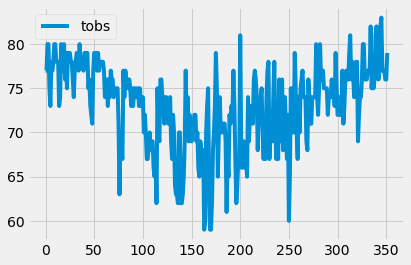

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data

# df represented as a variable 
df.plot()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# finding mean, minimum, maximum, standard deviation, and percentiles
# count is the number of times precipitation was observed 
# The other statistics are the precipitation amounts for each station for each day.

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# Finding out the number of stations 
session.query()

In [26]:
# find stations by referencing Station.station, which will give us the number of stations
# add .all() to end of query to get results as list

session.query(func.count(Station.station)).all()


[(9,)]

In [ ]:
# How many stations are available in this dataset?

# 9 stations from which precipitation data is being collected

In [27]:
# What are the most active stations?
# List the stations and the counts in descending order.

# step 1: 
session.query()

In [31]:
# add stations and counts to query 
# want to use groupby() fxn as we want to group the data by station name 
# adding order by fxn to get results in descending order 

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# for above:
# In the left column is the station ID, 
# and on the right are the counts for each station. The counts indicate which stations are most active

In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

# 1. For our most active station, we'll need to find the minimum, maximum, and average temperatures.

session.query()
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

# 2. We'll be filtering out everything but the station W. Avy is interested in -> station USC00519281 is most active

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

# Results: low temp, 54; highest temp: 85; and avg temp: 71.7

[(54.0, 85.0, 71.66378066378067)]

In [34]:
# Choose the station with the highest number of temperature observations.

# 1. To create a query, first select the column we are interested in. We want to pull Measurement.tobs in order to get our total observations count

session.query(Measurement.tobs)

# 2. Now filter out all the stations except the most active station with

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281')

# 3. need to apply another filter to consider only the most recent year

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [35]:
# convert results into a data frame 
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


In [36]:
# removing index column
print(df.to_string(index=False))

 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

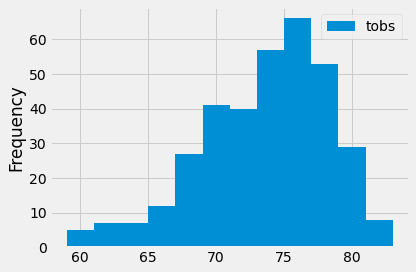

In [37]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# 1. We're going to divide our temperature observations into 12 different bins
# we need to use the plot() function and the hist() function and add the number of bins as a parameter

df.plot.hist(bins=12)

# Using plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot.
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge